<a href="https://colab.research.google.com/github/Nidhinbc97/ML-AI/blob/main/ML_AI_Assignment_test_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Load the dataset in Python environment

In [2]:
data = pd.read_csv('/content/test_loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
data.shape

(367, 12)

In [7]:
#Missing value handling

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [11]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
data['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [14]:
data['Gender'].mode()[0]

'Male'

In [15]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [16]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [17]:
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

In [18]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [19]:
data['Dependents'].value_counts()

0     210
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [21]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
data['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [23]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [25]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [26]:
data['LoanAmount'].unique()

array([110., 126., 208., 100.,  78., 152.,  59., 147., 280., 123.,  90.,
       162.,  40., 166., 124., 131., 200., 300.,  48.,  28., 101., 125.,
       290., 148., 140., 275.,  57.,  75., 192., 158., 176., 185., 116.,
       138.,  84., 108., 187., 120., 160.,  30.,  92., 130., 134., 189.,
       135., 188.,  95.,  65., 139., 232., 144., 155., 186.,  50., 150.,
       163., 360., 149., 257., 102.,  77., 390., 256.,  61., 107., 119.,
       165.,  93., 122., 157., 180.,  80., 104., 213., 146.,  71., 225.,
        70., 132., 105.,  83., 103., 550., 260., 199., 113., 117.,  72.,
       214., 133., 143., 209., 170.,  94.,  79., 159., 173., 235., 336.,
        96., 128., 412., 114., 115.,  88.,  55., 118., 212.,  74.,  66.,
        64., 142., 151.,  81., 171., 234., 184., 112.,  49.,  99., 240.,
       460., 297., 106., 141., 145., 177.,  68., 183., 121., 153.,  67.,
       181.,  35.,  46.,  87., 137., 254., 109., 197.,  85.,  60.,  76.,
        98.])

In [27]:
data['LoanAmount'].value_counts()

150.0    17
125.0    11
110.0    10
100.0     9
120.0     9
         ..
79.0      1
232.0     1
209.0     1
155.0     1
98.0      1
Name: LoanAmount, Length: 144, dtype: int64

In [28]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [30]:
data['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [32]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [33]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
# Outlier detection

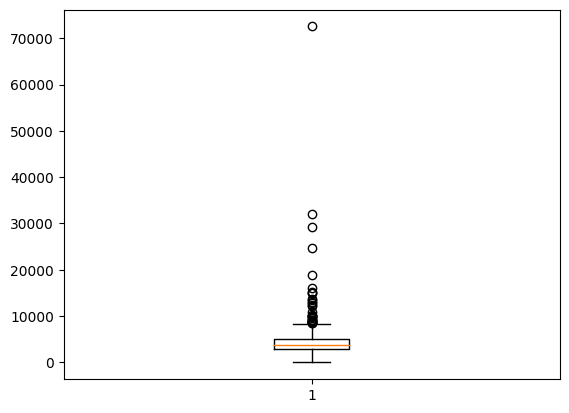

In [35]:
plt.boxplot(data['ApplicantIncome'])
plt.show()

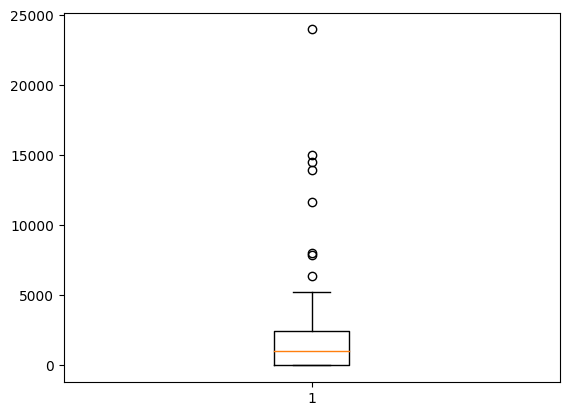

In [36]:
plt.boxplot(data['CoapplicantIncome'])
plt.show()

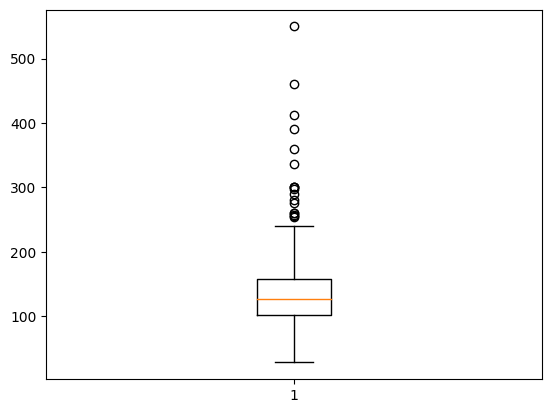

In [37]:
plt.boxplot(data['LoanAmount'])
plt.show()

In [38]:
#Encoding

In [39]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [40]:
data['Dependents'] = data['Dependents'].str.strip('+')

In [41]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,No,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [42]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [43]:
data['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [44]:
data['Dependents'] = data['Dependents'].astype(int)

In [45]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [46]:
q1 = data['LoanAmount'].quantile(0.25)
q2 = data['LoanAmount'].quantile(0.5)
q3 = data['LoanAmount'].quantile(0.75)

In [47]:
iqr = q3-q1

In [48]:
up_lim = q3+(1.5*iqr)
low_lim = q1-(1.5*iqr)

In [49]:
print(up_lim,low_lim)

242.25 16.25


In [51]:
data['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [52]:
data['Loan_ID'].nunique()

367

In [53]:
data['LoanAmount'].nunique()

144

In [54]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [55]:
req_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [56]:
x = data[req_col]
y = data['LoanAmount']

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [58]:
x.loc[:,['LoanAmount','ApplicantIncome']] = sc.fit_transform(x[['LoanAmount','ApplicantIncome']])

In [59]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,0.186461,0,-0.432321,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,-0.352692,1500,-0.169527,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,0.039641,1800,1.177292,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,-0.502774,2546,-0.596568,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,-0.311909,0,-0.957909,360.0,1.0,Urban
